medARC v0.1

In [1]:

import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scienceplots

plt.style.use(['nature'])
plt.rcParams['figure.dpi'] = 300


In [2]:


# Define the hypothetical folder path
folder_path = 'eval_results'

# Use glob to search for all JSON files in the folder that match the pattern *_health_summary.json
file_pattern = os.path.join(folder_path, '*_health_summary.json')
file_paths = glob.glob(file_pattern)

# Initialize an empty list to store the results
data = []

# Loop through the matching file paths
for file_path in file_paths:
    try:
        # Open and load the JSON file
        with open(file_path, 'r') as f:
            content = json.load(f)
        
        # Extract the accuracy
        accuracy = content['health']['acc']
        
        # Get the model name from the file name
        model_name = os.path.basename(file_path).replace('_health_summary.json', '')  # Remove the suffix to get the model name
        data.append({'model': model_name, 'accuracy': accuracy})
    
    except (FileNotFoundError, json.JSONDecodeError, KeyError) as e:
        print(f"Error processing file {file_path}: {e}")

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

df['model'] = df['model'].str.replace(r'-Instruct-*', '', regex=True)
df['model'] = df['model'].str.replace(r'v0.1', '', regex=True)
df['model'] = df['model'].str.replace(r'-20240229', '', regex=True)

print(df)

                         model  accuracy
0                Llama-3.1-70B   0.44000
1                medalpaca-13b   0.08046
2                 Meditron3-8B   0.36000
3                claude-3-opus   0.38000
4                 Llama-3.1-8B   0.23000
5                  gpt-4o-mini   0.15000
6      gemini-1.5-flash-latest   0.28000
7        gemini-1.5-pro-latest   0.50000
8               Mistral-7Bv0.3   0.22000
9                      o1-mini   0.31000
10  Llama3.1-405b-instruct-fp8   0.34000
11               Llama-3.3-70B   0.34000
12                      gpt-4o   0.25000
13             claude-3-sonnet   0.29000
14        o1-2024-12-17_200000   0.48000


In [18]:
human_avg = np.mean([.83, .61, .65, 0.47, 0.72]) 
df['order'] = [4, 0, 1, 8, 3, 11, 9, 10, 2, 13, 5, 6, 12, 7, 14]
df = df.sort_values('order')
df.loc[-1] = ['Human', human_avg, 16]  # adding a row

df['colors'] = ['#1f77b4', '#ff7f0e', '#2ca02c', 
                '#d62728',  '#d62728', '#d62728', '#d62728',
                '#9467bd', '#9467bd',
                '#8c564b', '#8c564b', 
                '#f7b6d2', '#f7b6d2',
                 '#e377c2', '#e377c2',  '#7f7f7f']

df["model"] = df["model"].str.replace('medalpaca-13b', 'Medalpaca-13b', regex=False)
df["model"] = df["model"].str.replace('Meditron3-8B', 'Meditron3-8b', regex=False)
df["model"] = df["model"].str.replace('claude-3-sonnet', 'Claude 3 Sonnet', regex=False)
df["model"] = df["model"].str.replace('claude-3-opus', 'Claude 3 Opus', regex=False)
df["model"] = df["model"].str.replace('Mistral-7Bv0.3', 'Mistral 7b', regex=False)
df["model"] = df["model"].str.replace('Llama-3.1-8B', 'Llama 3.1 8b', regex=False)
df["model"] = df["model"].str.replace('Llama-3.1-70B', 'Llama 3.1 70b', regex=False)
df["model"] = df["model"].str.replace('Llama3.1-405b-instruct-fp8', 'Llama 3.1 405b(fp8)', regex=False)
df["model"] = df["model"].str.replace('gemini-1.5-flash-latest', 'Gemini 1.5 Flash', regex=False)
df["model"] = df["model"].str.replace('gemini-1.5-pro-latest', 'Gemini 1.5 Pro', regex=False)
df["model"] = df["model"].str.replace('gpt-4o-mini', 'GPT-4o-mini', regex=False)
df["model"] = df["model"].str.replace('gpt-4o', 'GPT-4o', regex=False)
# df["model"] = df["model"].str.replace('o1-2024-12-17_25000', 'o1 25k', regex=False)
# df["model"] = df["model"].str.replace('o1-2024-12-17_50000', 'o1 50k', regex=False)
# df["model"] = df["model"].str.replace('o1-2024-12-17_100000', 'o1 100k', regex=False)
df["model"] = df["model"].str.replace('o1-2024-12-17_200000', 'o1', regex=False)

# Output the final DataFrame
print(df)

                   model  accuracy  order   colors
 1         Medalpaca-13b   0.08046      0  #1f77b4
 2          Meditron3-8b   0.36000      1  #ff7f0e
 8            Mistral 7b   0.22000      2  #2ca02c
 4          Llama 3.1 8b   0.23000      3  #d62728
 0         Llama 3.1 70b   0.44000      4  #d62728
 10  Llama 3.1 405b(fp8)   0.34000      5  #d62728
 11        Llama-3.3-70B   0.34000      6  #d62728
 13      Claude 3 Sonnet   0.29000      7  #9467bd
 3         Claude 3 Opus   0.38000      8  #9467bd
 6      Gemini 1.5 Flash   0.28000      9  #8c564b
 7        Gemini 1.5 Pro   0.50000     10  #8c564b
 5           GPT-4o-mini   0.15000     11  #f7b6d2
 12               GPT-4o   0.25000     12  #f7b6d2
 9               o1-mini   0.31000     13  #e377c2
 14                   o1   0.48000     14  #e377c2
-1                 Human   0.65600     16  #7f7f7f


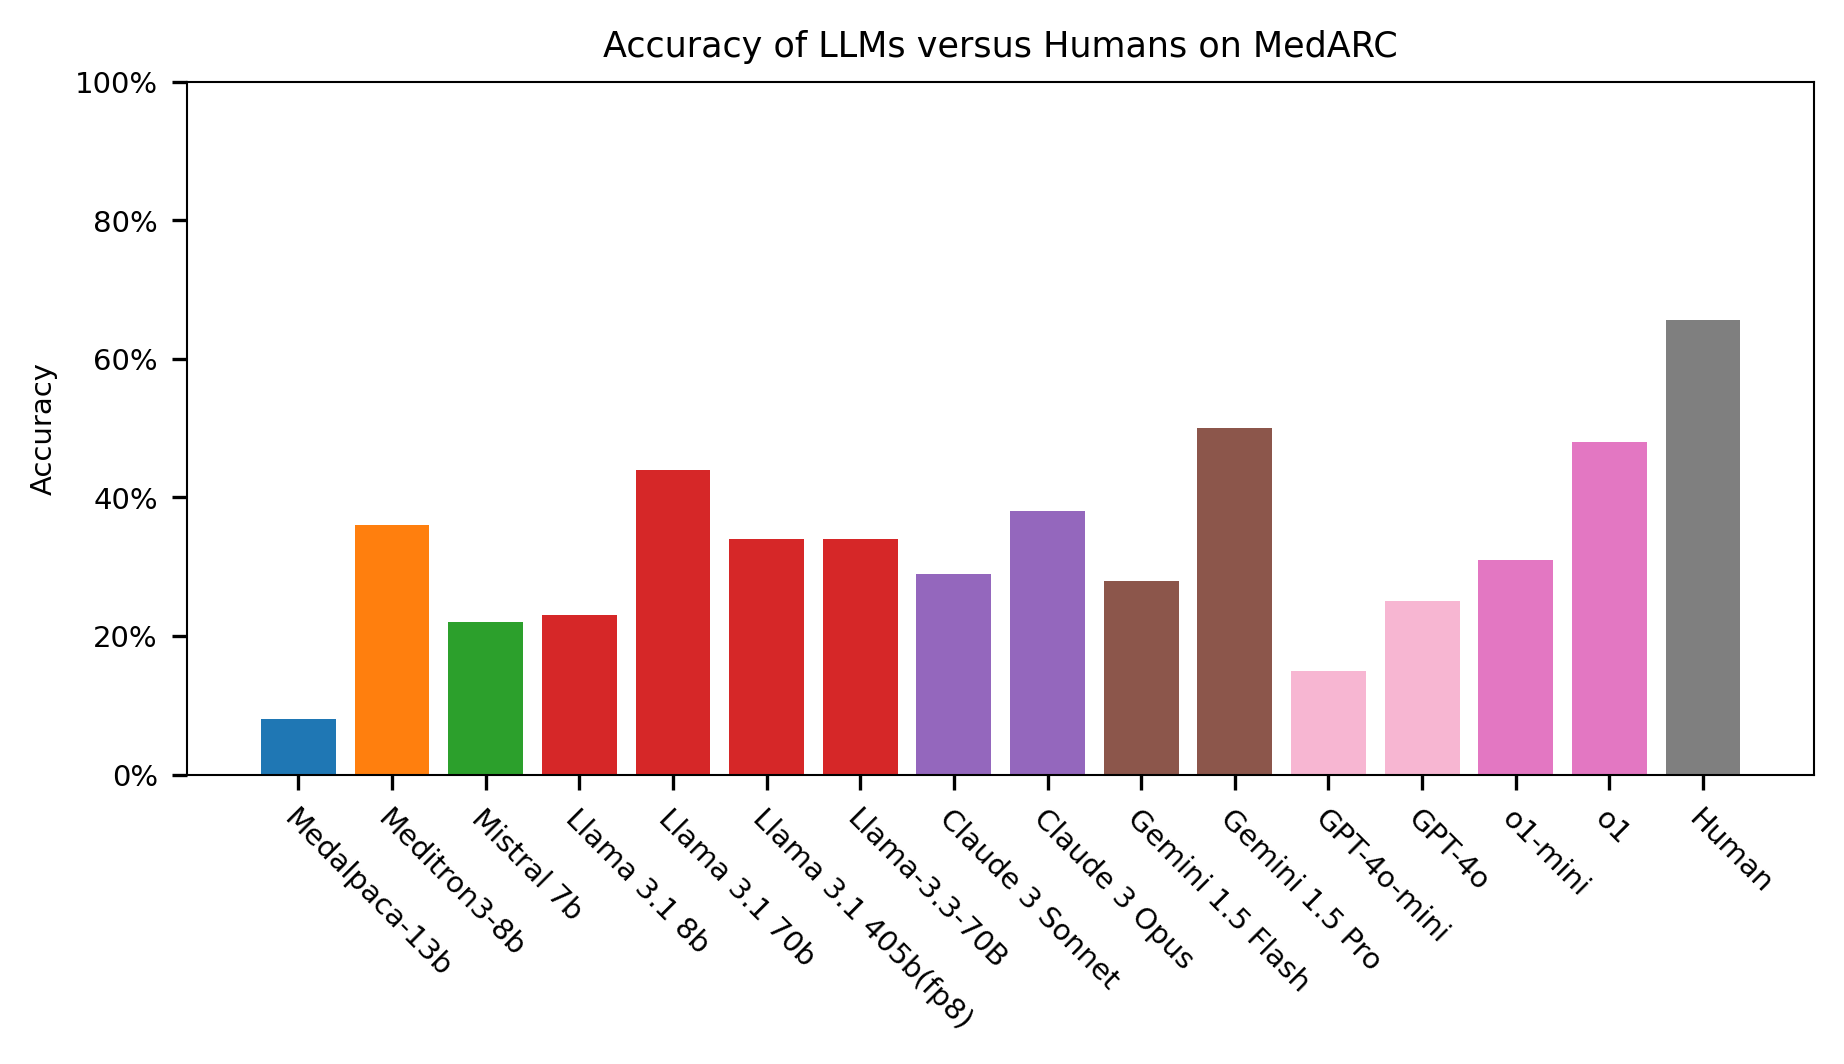

In [21]:
models = df['model']
accuracies = df['accuracy']

fig, ax = plt.subplots(figsize=(7,3))

# Color cyling
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# ax.bar(models, accuracies, color=[colors[i % len(colors)] for i in range(len(models))])

# Grouped colors
ax.bar(models, accuracies, color=df['colors'])

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of LLMs versus Humans on MedARC')

ax.set_ylim(0, 1)  # Assuming the values range from 0 to 1
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))

plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor" ) 


plt.ylim(0,1)
plt.show()


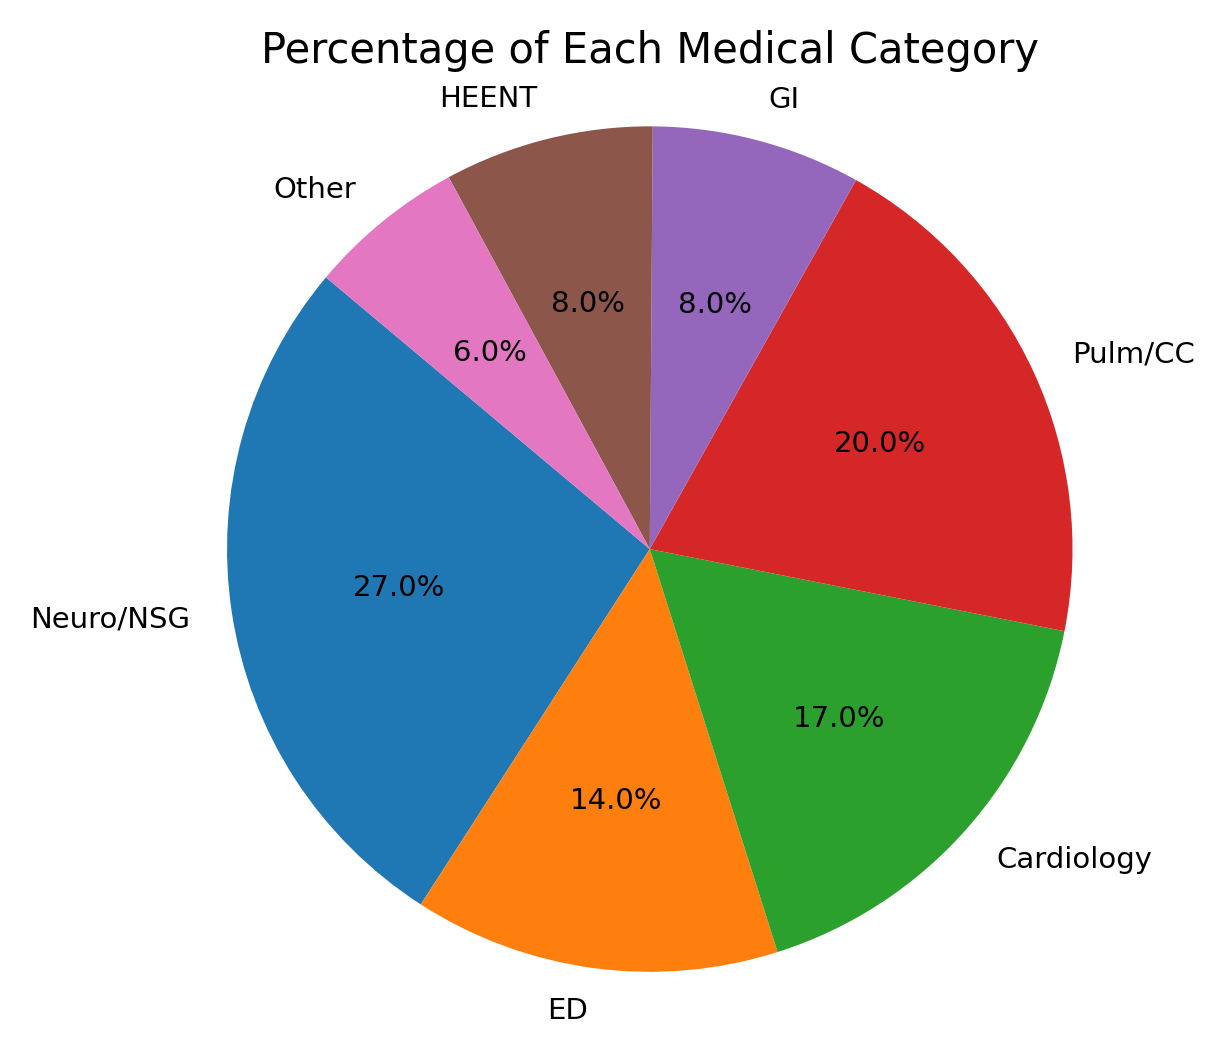

In [28]:

# Original counts
categories = {
    "Neuro/NSG": 27,
    "ED": 14,
    "Cardiology": 17,
    "ID": 3,
    "Pulm/CC": 20,
    "GI": 8,
    "ObGyn": 1,
    "HEENT": 8,
    "Ophtho": 2
}

# 1. Lump together categories with fewer than 5 counts into "Other"
lumped_categories = {}
other_count = 0

for cat, count in categories.items():
    if count < 5:
        other_count += count
    else:
        lumped_categories[cat] = count

# Add the "Other" category if any counts fell below 5
if other_count > 0:
    lumped_categories["Other"] = other_count

# 2. Prepare data for the pie chart
labels = list(lumped_categories.keys())
sizes = list(lumped_categories.values())

# 3. Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Percentage of Each Medical Category", fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
